In [1]:
import os
import plots
import directory
import numpy as np
import pandas as pd
import plotly.express as px
import tensorflow as tf
from matplotlib import rcParams
from matplotlib import pyplot as plt


pd.set_option('display.max_rows', None, 'display.max_columns', None)
np.set_printoptions(threshold=np.inf)
# np.set_printoptions(suppress=True) #dont use scientific notation


print('Tensorflow version ', tf.__version__)
print('Num GPUs Available: ', len(tf.config.list_physical_devices('GPU')))



Tensorflow version  2.10.0
Num GPUs Available:  1


### Show the history and results for the raw dataset

Here we've increased the complexity of the model to capture some more NEO's and overlap heavily with non-NEOs. We gained another 2% for NEOs  Same plots as before.  Sometimes you have to rerun the cell to see the graph. You can also run the whole notebook.  It takes about 10 seconds to run.

The plots below are the False Positives.  The results show objects that have very small values for ra, dec and sq.  
With the values being so small I think that these should actually be non-neos.

NEOs Found (True Positives): 94.09%

NEOs Missed (False Negatives): 5.91%

Non-NEOs Identified (True Negatives): 97.20%

Non-NEOs Incorrectly Identified (False Positives): 2.80%

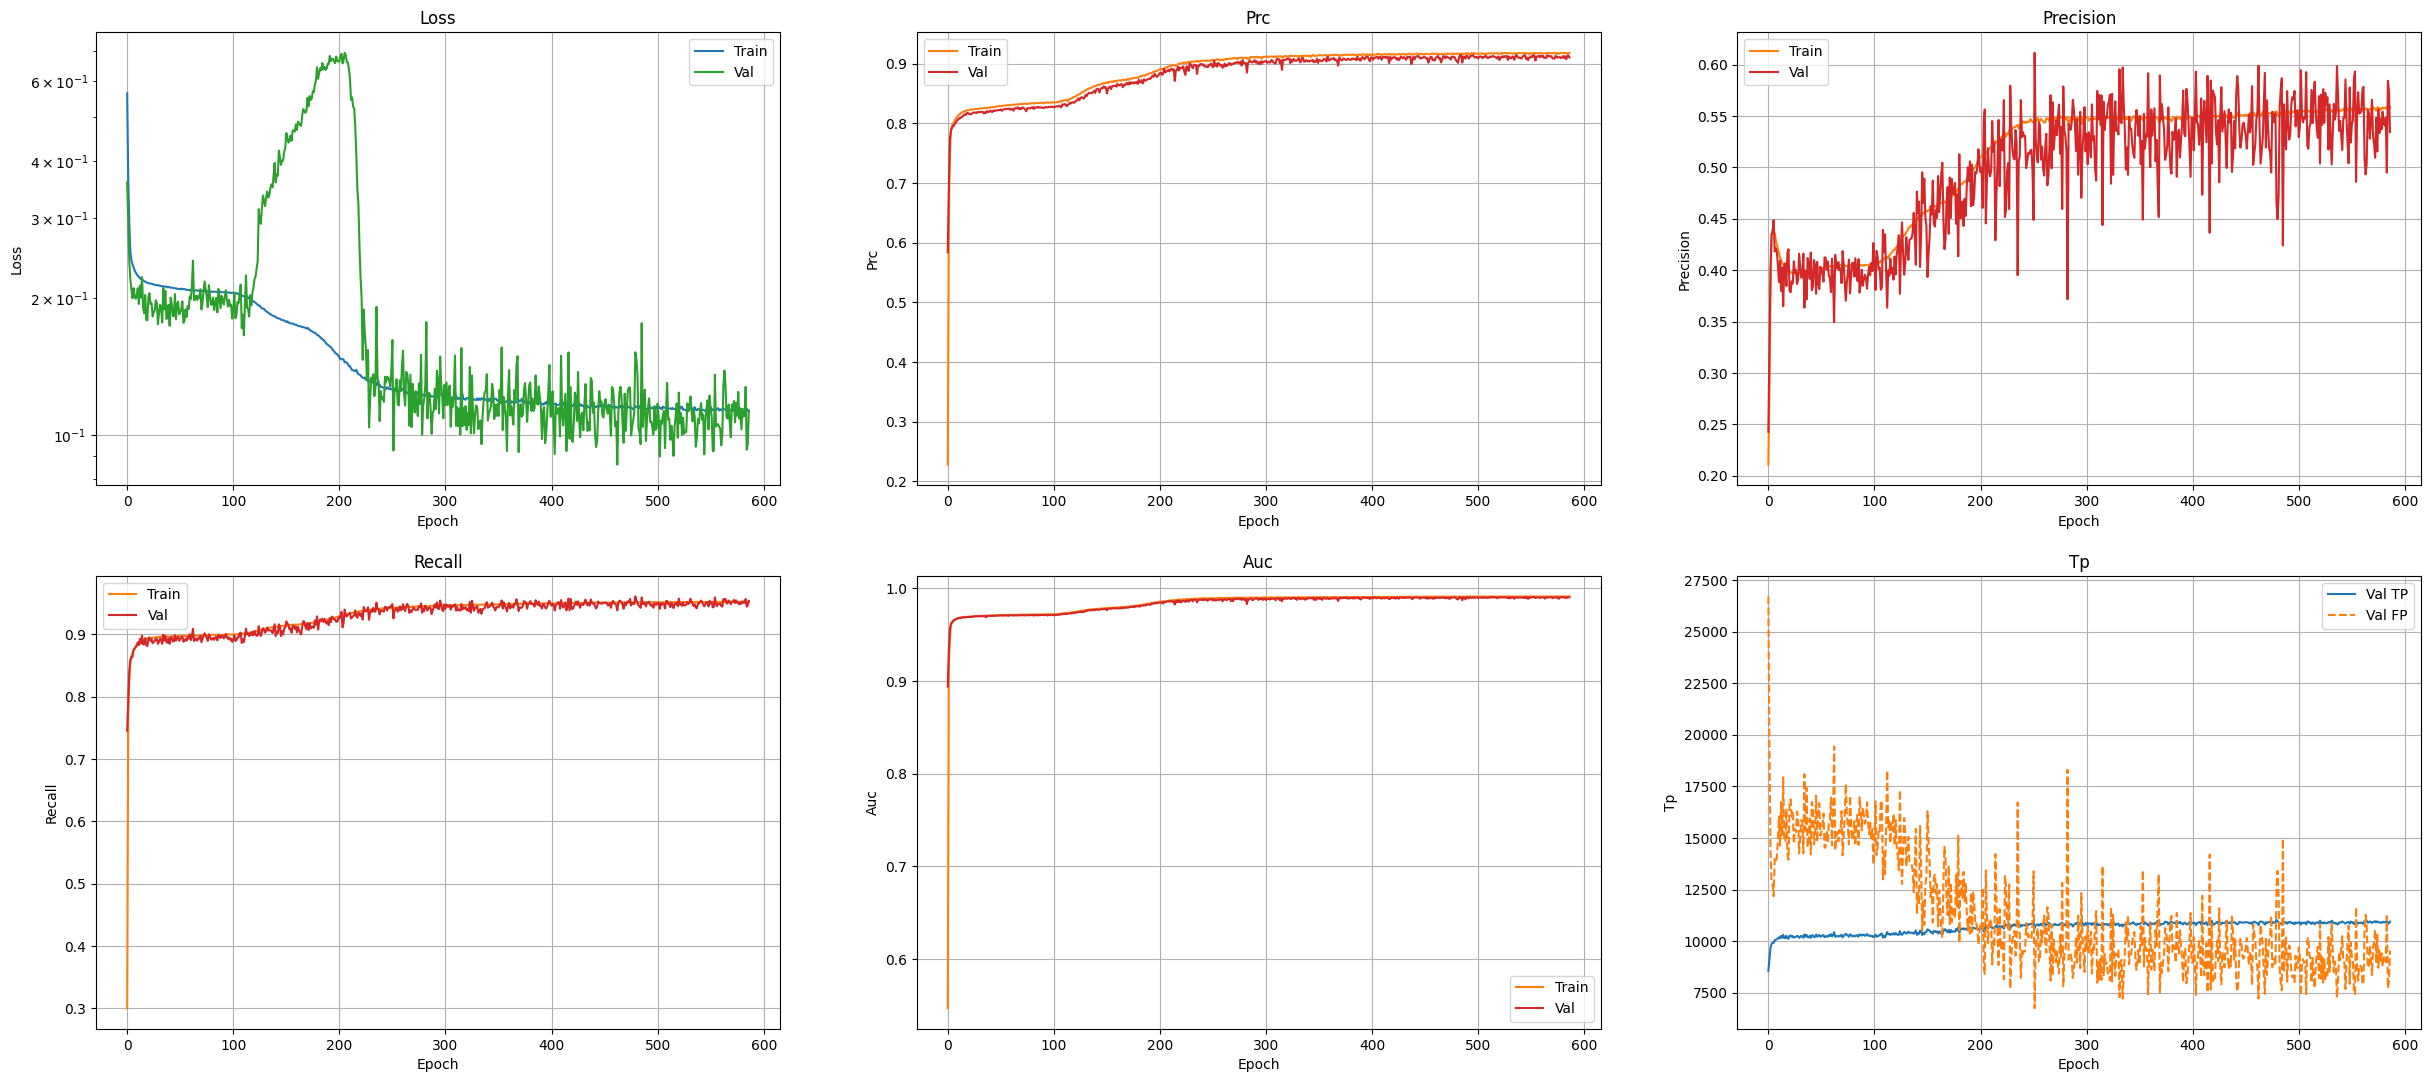

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


NEOs Found (True Positives): 94.09%
NEOs Missed (False Positives): 5.91%
Non-NEOs Identified (True Negatives): 97.20%
Non-NEOs Incorrectly Identified (False Negatives): 2.80%


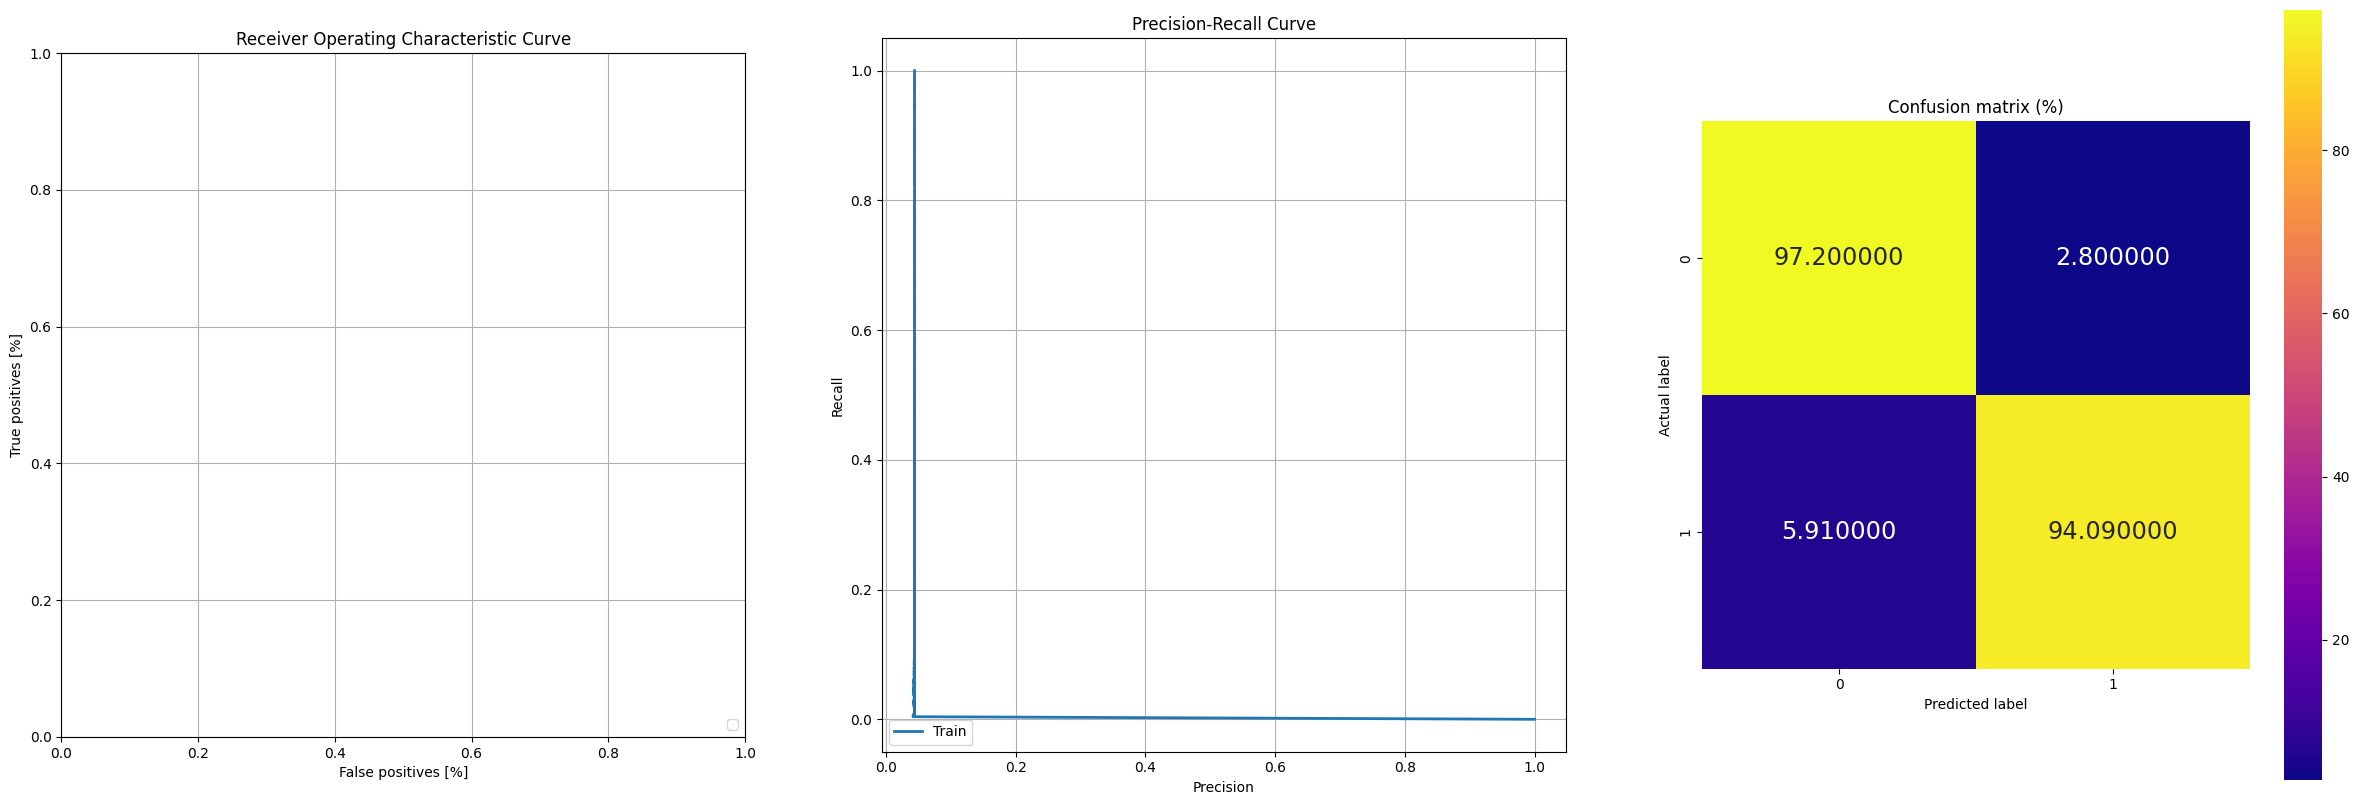

In [2]:

filename = '64_32.npy'
fp_filename = 'baseline_64_32_false_positives.csv'
history_path = os.path.join(directory.data_dir, 'history_'+filename)
history = np.load(history_path, allow_pickle=True).tolist()
history.items()

results_path = os.path.join(directory.data_dir, 'results_'+filename)
results = np.load(results_path, allow_pickle=True).tolist()
results.items()

rcParams['figure.figsize'] = (30, 20)
plots.plot_metrics(history)
# plots.plot_metrics(history1, 1)
plt.show()
rcParams['figure.figsize'] = (30, 10)
plots.results(results)
plt.show()


### Plot False Positives

In [ ]:
predictions = pd.DataFrame(results['predictions'])
fp = predictions[predictions['fp'] == 1]

display(fp[fp['mu_ra_0'].between(-0.05, 0.05, inclusive=False)])
fp_path = os.path.join(directory.data_dir, fp_filename)
fp.to_csv(fp_path, index=False)

In [4]:
fig = px.scatter(fp, x='JDUTC_0', y='mu_ra_0')
fig.show()

In [5]:
fig = px.scatter(fp, x='JDUTC_0', y='mu_dec_1')
fig.show()

In [6]:
fig = px.scatter(fp, x='JDUTC_0', y='mu_sq_0')
fig.show()

In [7]:
fig = px.scatter(fp, x='JDUTC_0', y='X_0')
fig.show()

In [8]:
fig = px.scatter(fp, x='JDUTC_0', y='Y_0')
fig.show()

In [9]:
fig = px.scatter(fp, x='JDUTC_0', y='Z_0')
fig.show()

In [10]:
fig = px.scatter(fp, x='JDUTC_0', y='M_0')
fig.show()

In [11]:
fig = px.scatter(fp, x='mu_ra_0', y='mu_dec_0', log_x=True, log_y=True)
fig.show()

In [12]:
fig = px.scatter(fp, x='mu_ra_0', y='mu_sq_0', log_x=True, log_y=True)
fig.show()

In [13]:
fig = px.scatter(fp, x='mu_sq_0', y='mu_sq_1', log_x=True, log_y=True)
fig.show()

In [14]:
fig = px.scatter(fp, x='mu_sq_1', y='mu_sq_2', log_x=True, log_y=True)
fig.show()

In [15]:
fig = px.scatter(fp, x='mu_sq_2', y='mu_sq_3', log_x=True, log_y=True)
fig.show()